In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
import numpy as np
from sklearn.cluster import KMeans

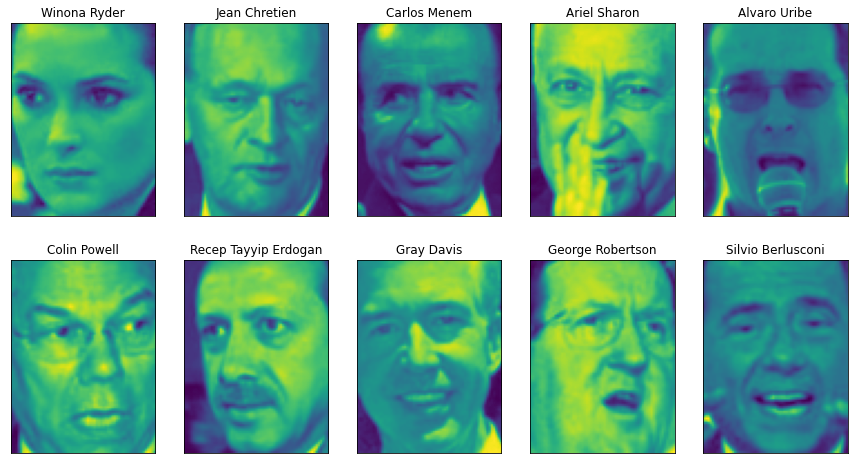

In [6]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [7]:
#count how ofter each target appears
counts = np.bincount(people.target)
#print name next to each target name
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end= ' ')
    if(i+1)%3 ==0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [8]:
# to make data less skewed, will take up to 50 images of each person
mask = np.zeros(people.target.shape, dtype= bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] =1
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale value to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people /255

In [9]:
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca=pca.transform(X_people)

In [11]:
km = KMeans(n_clusters=10, random_state=0)
labels_km=km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))
# kmeans clustering partitioned the data into relatively similar sized clusters from 64 to 386. This is quite different from DBSCAN

Cluster sizes k-means: [113 256 188 147 216 180 258 211 139 355]


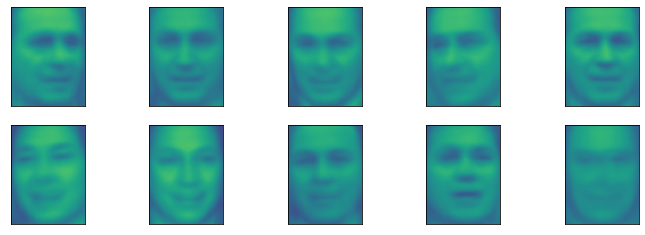

In [12]:
fig, axes=plt.subplots(2,5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12,4))
for center, ax in zip(km.cluster_centers_,axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

In [ ]:
'''
1. cluster centers found by k-means are very smooth versions of faces.
2. Working with a reduced PCA representation addes to the smoothness of the images
3. CLustering seems to pick up on differnet orientations of the faces, different expression adn the presence of shirt collars.
'''

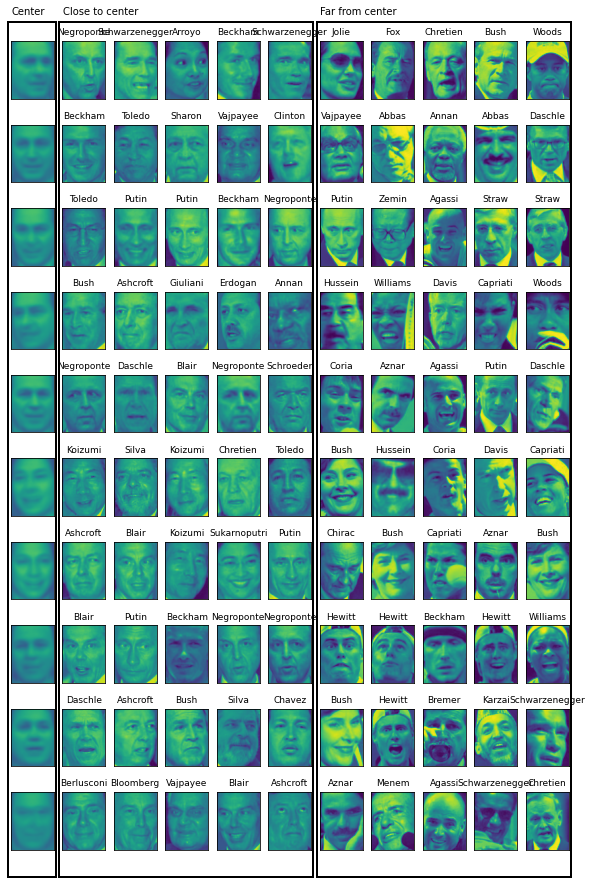

In [14]:
import mglearn
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

In [ ]:
'''
1. The plot above confimrs out intuition about smiling faces for the third cluster, and also the importance of orientation
for the other clustersn.
2. The atypical points are not very similar to the cluster centers, though and their assignment seems somewhat arbitrary.
3. k-means partitions all the data points adn doesnot have a concept of noise points like DBSCAN/
4. using larger numjber of clusters the algo could find finer distinctions.

'''